In [6]:
#import required packages
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import earthpy as et
import pandas as pd
import pickle
import matplotlib.patches as mpatches

#read in the city info table
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT'))
CITY_COUNTRY_lat_lon = pd.read_excel('CITY_COUNTRY_lat_lon.xlsx', index_col=None)

In [7]:
#read in the tables
#read in parameters
CITY_COUNTRY = "ANAPOLIS_BRAZIL"    
City_name = CITY_COUNTRY_lat_lon[CITY_COUNTRY_lat_lon['CITY_COUNTRY'] == CITY_COUNTRY]['City'].values[0]
#Read pickle files in 
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))

pickle_name = 'Parameters_Day_inital_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_parameters_day = pickle.load(f)
pickle_name = 'Parameters_Night_inital_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_parameters_night = pickle.load(f)

#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    terra_parameters_night_qc = pickle.load(f)
    
    
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))

#all parameters
pickle_name = 'Parameters_Day_inital_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_parameters_day = pickle.load(f)
pickle_name = 'Parameters_Night_inital_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_parameters_night = pickle.load(f)

#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    aqua_parameters_night_qc = pickle.load(f)    
        
#set the filepath back to where want to save figs    
os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT', 'MODIS_8_day_LST_outputs', CITY_COUNTRY))

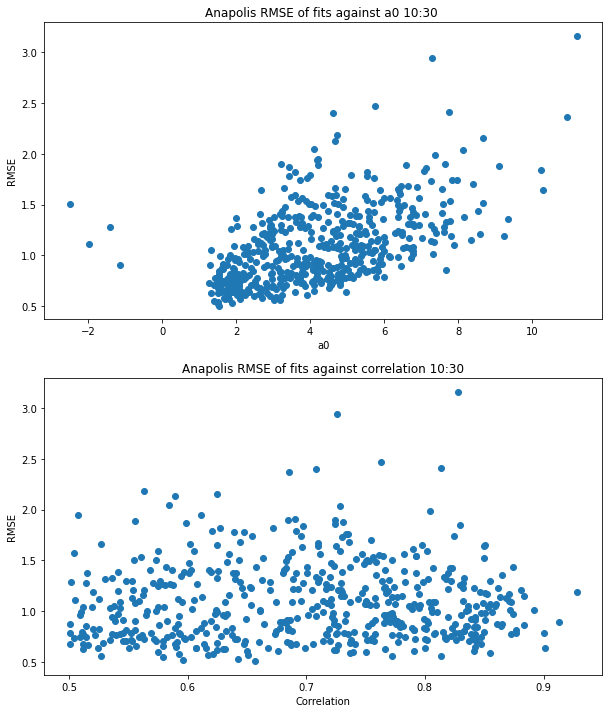

In [8]:
#Analysis of the fit
#terra day
fit_analysis = terra_parameters_day.copy()
overpass_time = '10:30'
overpass_name = 'terraday'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['day_std_dev_a0'] / fit_analysis['day_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_x0'] / fit_analysis['day_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_y0'] / fit_analysis['day_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_phi'] / fit_analysis['day_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ax'] / fit_analysis['day_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ay'] / fit_analysis['day_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
rmse_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].day_a0
corr_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)]['corr']

fig, axes = plt.subplots(nrows = 2,ncols = 1, figsize=(10, 12))
axes[0].scatter(a0_fits, rmse_fits)
axes[0].set(xlabel = 'a0', ylabel = 'RMSE', title = '{} RMSE of fits against a0 {} '.format(City_name, overpass_time))
axes[1].scatter(corr_fits, rmse_fits)
axes[1].set(xlabel = 'Correlation', ylabel = 'RMSE'
            , title = '{} RMSE of fits against correlation {}'.format(City_name, overpass_time))


#save 
plt.savefig('{}_rmse_fits_{}.png'.format(City_name,overpass_name))

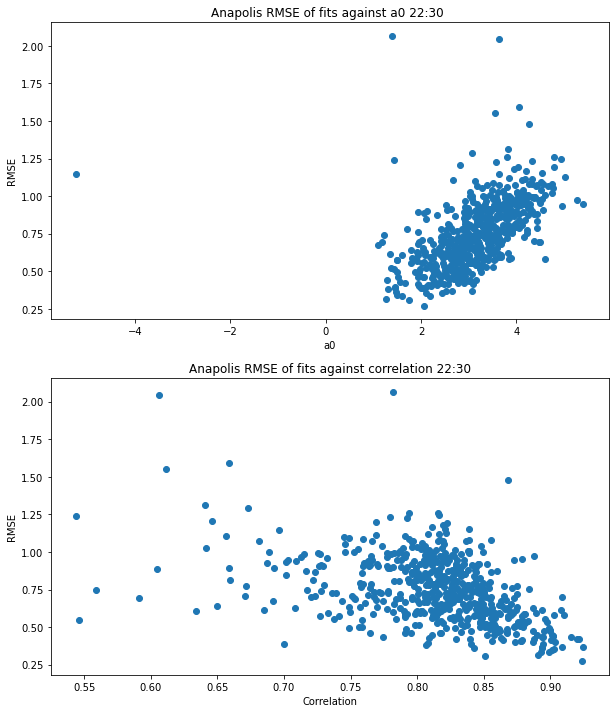

In [9]:
#Analysis of the fit
#terra night
fit_analysis = terra_parameters_night.copy()
overpass_time = '22:30'
overpass_name = 'terranight'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['night_std_dev_a0'] / fit_analysis['night_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_x0'] / fit_analysis['night_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_y0'] / fit_analysis['night_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_phi'] / fit_analysis['night_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ax'] / fit_analysis['night_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ay'] / fit_analysis['night_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
rmse_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].night_a0
corr_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)]['corr']

fig, axes = plt.subplots(nrows = 2,ncols = 1, figsize=(10, 12))
axes[0].scatter(a0_fits, rmse_fits)
axes[0].set(xlabel = 'a0', ylabel = 'RMSE', title = '{} RMSE of fits against a0 {} '.format(City_name, overpass_time))
axes[1].scatter(corr_fits, rmse_fits)
axes[1].set(xlabel = 'Correlation', ylabel = 'RMSE'
            , title = '{} RMSE of fits against correlation {}'.format(City_name, overpass_time))

#save 
plt.savefig('{}_rmse_fits_{}.png'.format(City_name,overpass_name))

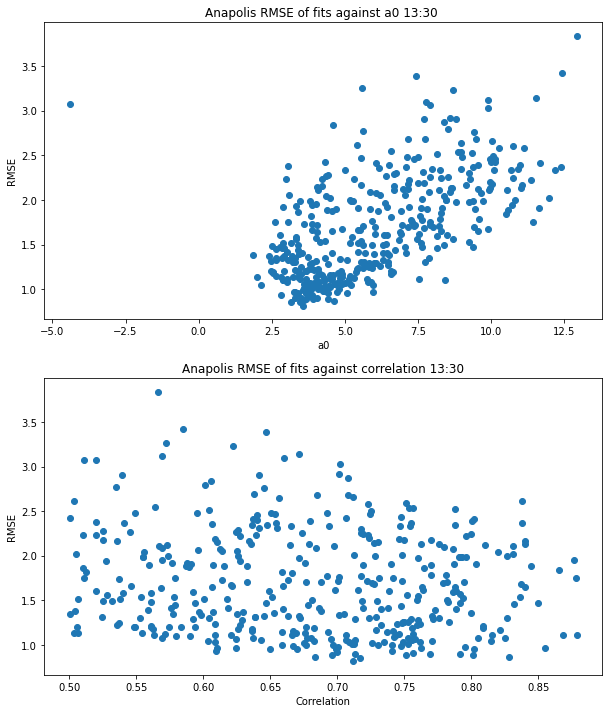

In [10]:
#Analysis of the fit
#aqua day
fit_analysis = aqua_parameters_day.copy()
overpass_time = '13:30'
overpass_name = 'aquaday'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['day_std_dev_a0'] / fit_analysis['day_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_x0'] / fit_analysis['day_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_y0'] / fit_analysis['day_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_phi'] / fit_analysis['day_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ax'] / fit_analysis['day_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ay'] / fit_analysis['day_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
rmse_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].day_a0
corr_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)]['corr']

fig, axes = plt.subplots(nrows = 2,ncols = 1, figsize=(10, 12))
axes[0].scatter(a0_fits, rmse_fits)
axes[0].set(xlabel = 'a0', ylabel = 'RMSE', title = '{} RMSE of fits against a0 {} '.format(City_name, overpass_time))
axes[1].scatter(corr_fits, rmse_fits)
axes[1].set(xlabel = 'Correlation', ylabel = 'RMSE'
            , title = '{} RMSE of fits against correlation {}'.format(City_name, overpass_time))

#save 
plt.savefig('{}_rmse_fits_{}.png'.format(City_name,overpass_name))

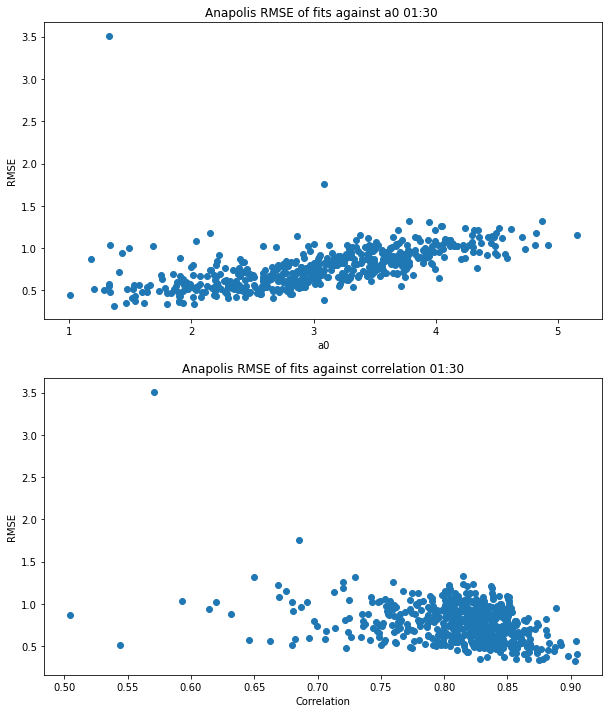

In [11]:
#Analysis of the fit
#aqua night
fit_analysis = aqua_parameters_night.copy()
overpass_time = '01:30'
overpass_name = 'aquanight'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['night_std_dev_a0'] / fit_analysis['night_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_x0'] / fit_analysis['night_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_y0'] / fit_analysis['night_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_phi'] / fit_analysis['night_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ax'] / fit_analysis['night_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ay'] / fit_analysis['night_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
rmse_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].night_a0
corr_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)]['corr']

fig, axes = plt.subplots(nrows = 2,ncols = 1, figsize=(10, 12))
axes[0].scatter(a0_fits, rmse_fits)
axes[0].set(xlabel = 'a0', ylabel = 'RMSE', title = '{} RMSE of fits against a0 {} '.format(City_name, overpass_time))
axes[1].scatter(corr_fits, rmse_fits)
axes[1].set(xlabel = 'Correlation', ylabel = 'RMSE'
            , title = '{} RMSE of fits against correlation {}'.format(City_name, overpass_time))

#save 
plt.savefig('{}_rmse_fits_{}.png'.format(City_name,overpass_name))

In [131]:
#Quality check
parameters_df = terra_parameters_day
#number of images with corr < 0.5 
print('corr < 0.5:', len(parameters_df[parameters_df['corr'] < 0.5].index))

#number with rmse > 2
print('rmse > 2:', len(parameters_df[parameters_df['rmse'] > 2].index))


#Number of images with parameter standard deviation higher than mean
print('a0:', len(parameters_df[abs(parameters_df['day_std_dev_a0'] / parameters_df['day_a0']) > 1].index))

print('x0:', len(parameters_df[abs(parameters_df['day_std_dev_x0'] / parameters_df['day_x0']) > 1].index))

print('y0:', len(parameters_df[abs(parameters_df['day_std_dev_y0'] / parameters_df['day_y0']) > 1].index))

print('phi:', len(parameters_df[abs(parameters_df['day_std_dev_phi'] / parameters_df['day_phi']) > 1].index))

print('ax:', len(parameters_df[abs(parameters_df['day_std_dev_ax'] / parameters_df['day_ax']) > 1].index))

print('ay:', len(parameters_df[abs(parameters_df['day_std_dev_ay'] / parameters_df['day_ay']) > 1].index))

print('quantile_a0:', len(parameters_df[np.isnan(parameters_df["quantile_a0"])].index))

#print('number of no fits:', len(parameters_df_qu[np.isnan(parameters_df_qu['day_a0'])]))

print('total:', len(parameters_df) )

corr < 0.5: 162
rmse > 1.5: 25
a0: 3
x0: 46
y0: 11
phi: 3
ax: 2
ay: 1
quantile_a0: 0
total: 748


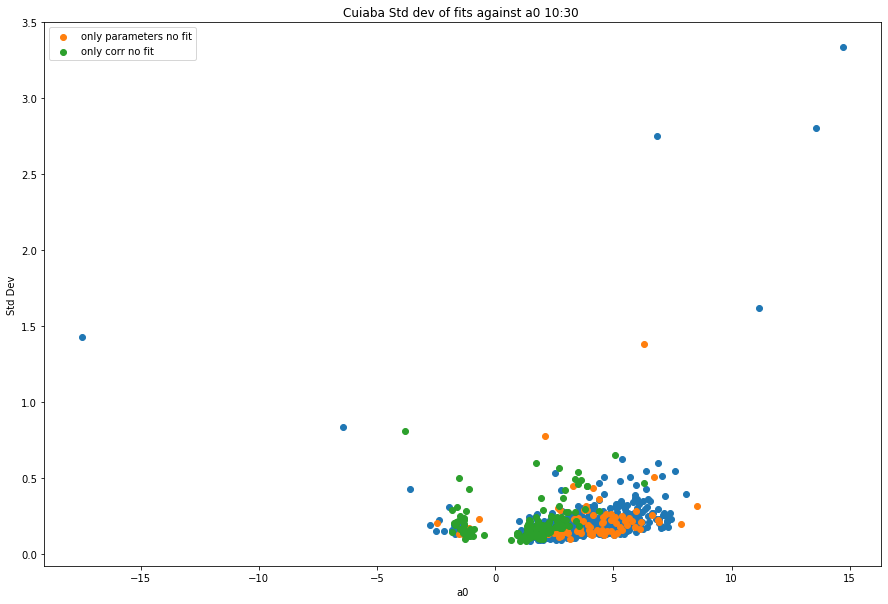

In [159]:
#Analysis of the fit
#terra day
fit_analysis = terra_parameters_day.copy()
overpass_time = '10:30'
overpass_name = 'terraday'

#remove outliers that mean y scale is too large
fit_analysis = fit_analysis[(fit_analysis['day_std_dev_a0'] < 5)].copy()

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['day_std_dev_a0'] / fit_analysis['day_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_x0'] / fit_analysis['day_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_y0'] / fit_analysis['day_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_phi'] / fit_analysis['day_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ax'] / fit_analysis['day_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ay'] / fit_analysis['day_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].day_a0
a0_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].day_std_dev_a0

a0_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].day_a0
a0_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].day_std_dev_a0

a0_param_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].day_a0
a0_param_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].day_std_dev_a0

a0_corr_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].day_a0
a0_corr_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].day_std_dev_a0


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(15, 10))
axes.scatter(a0_fits, a0_fits_sd)
#axes.scatter(a0_no_fits, a0_no_fits_sd, label = 'Both criteria no fit')
axes.scatter(a0_param_no_fits, a0_param_no_fits_sd, label = 'only parameters no fit')
axes.scatter(a0_corr_no_fits, a0_corr_no_fits_sd, label = 'only corr no fit')
axes.set(xlabel = 'a0', ylabel = 'Std Dev', title = '{} Std dev of fits against a0 {} '.format(City_name, overpass_time))
plt.legend()

#save 
plt.savefig('{}_sd_v_a0_fits_{}.png'.format(City_name,overpass_name))

In [150]:
#Quality check
parameters_df = terra_parameters_night
#number of images with corr < 0.5 
print('corr < 0.5:', len(parameters_df[parameters_df['corr'] < 0.5].index))

#number with rmse > 2
print('rmse > 2:', len(parameters_df[parameters_df['rmse'] > 2].index))


#Number of images with parameter standard deviation higher than mean
print('a0:', len(parameters_df[abs(parameters_df['night_std_dev_a0'] / parameters_df['night_a0']) > 1].index))

print('x0:', len(parameters_df[abs(parameters_df['night_std_dev_x0'] / parameters_df['night_x0']) > 1].index))

print('y0:', len(parameters_df[abs(parameters_df['night_std_dev_y0'] / parameters_df['night_y0']) > 1].index))

print('phi:', len(parameters_df[abs(parameters_df['night_std_dev_phi'] / parameters_df['night_phi']) > 1].index))

print('ax:', len(parameters_df[abs(parameters_df['night_std_dev_ax'] / parameters_df['night_ax']) > 1].index))

print('ay:', len(parameters_df[abs(parameters_df['night_std_dev_ay'] / parameters_df['night_ay']) > 1].index))

print('quantile_a0:', len(parameters_df[np.isnan(parameters_df["quantile_a0"])].index))

#print('number of no fits:', len(parameters_df_qu[np.isnan(parameters_df_qu['day_a0'])]))

print('total:', len(parameters_df) )

corr < 0.5: 17
rmse > 2: 6
a0: 0
x0: 112
y0: 8
phi: 5
ax: 0
ay: 0
quantile_a0: 0
total: 592


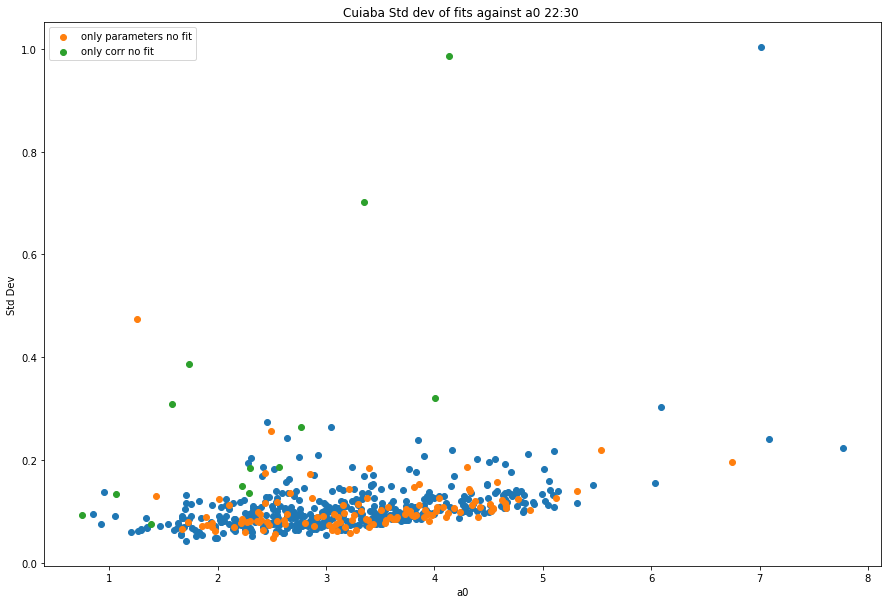

In [151]:
#Analysis of the fit
#terra night
fit_analysis = terra_parameters_night.copy()
overpass_time = '22:30'
overpass_name = 'terranight'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['night_std_dev_a0'] / fit_analysis['night_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_x0'] / fit_analysis['night_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_y0'] / fit_analysis['night_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_phi'] / fit_analysis['night_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ax'] / fit_analysis['night_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ay'] / fit_analysis['night_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].night_a0
a0_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].night_std_dev_a0

a0_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].night_a0
a0_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].night_std_dev_a0

a0_param_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].night_a0
a0_param_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].night_std_dev_a0

a0_corr_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].night_a0
a0_corr_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].night_std_dev_a0


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(15, 10))
axes.scatter(a0_fits, a0_fits_sd)
#axes.scatter(a0_no_fits, a0_no_fits_sd, label = 'Both criteria no fit')
axes.scatter(a0_param_no_fits, a0_param_no_fits_sd, label = 'only parameters no fit')
axes.scatter(a0_corr_no_fits, a0_corr_no_fits_sd, label = 'only corr no fit')
axes.set(xlabel = 'a0', ylabel = 'Std Dev', title = '{} Std dev of fits against a0 {} '.format(City_name, overpass_time))
plt.legend()

#save 
plt.savefig('{}_sd_v_a0_fits_{}.png'.format(City_name,overpass_name))

In [152]:
#Quality check
parameters_df = aqua_parameters_day
#number of images with corr < 0.5 
print('corr < 0.5:', len(parameters_df[parameters_df['corr'] < 0.5].index))

#number with rmse > 2
print('rmse > 2:', len(parameters_df[parameters_df['rmse'] > 2].index))


#Number of images with parameter standard deviation higher than mean
print('a0:', len(parameters_df[abs(parameters_df['day_std_dev_a0'] / parameters_df['day_a0']) > 1].index))

print('x0:', len(parameters_df[abs(parameters_df['day_std_dev_x0'] / parameters_df['day_x0']) > 1].index))

print('y0:', len(parameters_df[abs(parameters_df['day_std_dev_y0'] / parameters_df['day_y0']) > 1].index))

print('phi:', len(parameters_df[abs(parameters_df['day_std_dev_phi'] / parameters_df['day_phi']) > 1].index))

print('ax:', len(parameters_df[abs(parameters_df['day_std_dev_ax'] / parameters_df['day_ax']) > 1].index))

print('ay:', len(parameters_df[abs(parameters_df['day_std_dev_ay'] / parameters_df['day_ay']) > 1].index))

print('quantile_a0:', len(parameters_df[np.isnan(parameters_df["quantile_a0"])].index))

#print('number of no fits:', len(parameters_df_qu[np.isnan(parameters_df_qu['day_a0'])]))

print('total:', len(parameters_df) )

corr < 0.5: 157
rmse > 2: 188
a0: 0
x0: 79
y0: 19
phi: 5
ax: 0
ay: 0
quantile_a0: 0
total: 650


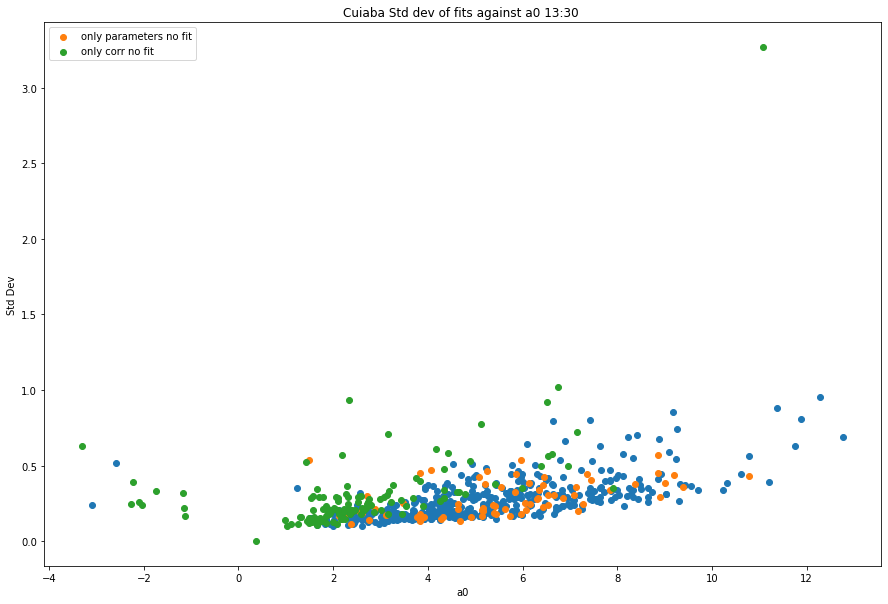

In [153]:
#Analysis of the fit
#aqua day
fit_analysis = aqua_parameters_day.copy()
overpass_time = '13:30'
overpass_name = 'aquaday'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['day_std_dev_a0'] / fit_analysis['day_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_x0'] / fit_analysis['day_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_y0'] / fit_analysis['day_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_phi'] / fit_analysis['day_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ax'] / fit_analysis['day_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['day_std_dev_ay'] / fit_analysis['day_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].day_a0
a0_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].day_std_dev_a0

a0_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].day_a0
a0_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].day_std_dev_a0

a0_param_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].day_a0
a0_param_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].day_std_dev_a0

a0_corr_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].day_a0
a0_corr_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].day_std_dev_a0


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(15, 10))
axes.scatter(a0_fits, a0_fits_sd)
#axes.scatter(a0_no_fits, a0_no_fits_sd, label = 'Both criteria no fit')
axes.scatter(a0_param_no_fits, a0_param_no_fits_sd, label = 'only parameters no fit')
axes.scatter(a0_corr_no_fits, a0_corr_no_fits_sd, label = 'only corr no fit')
axes.set(xlabel = 'a0', ylabel = 'Std Dev', title = '{} Std dev of fits against a0 {} '.format(City_name, overpass_time))
plt.legend()

#save 
plt.savefig('{}_sd_v_a0_fits_{}.png'.format(City_name,overpass_name))

In [137]:
#Quality check
parameters_df = aqua_parameters_night
#number of images with corr < 0.5 
print('corr < 0.5:', len(parameters_df[parameters_df['corr'] < 0.5].index))

#number with rmse > 2
print('rmse > 2:', len(parameters_df[parameters_df['rmse'] > 2].index))


#Number of images with parameter standard deviation higher than mean
print('a0:', len(parameters_df[abs(parameters_df['night_std_dev_a0'] / parameters_df['night_a0']) > 1].index))

print('x0:', len(parameters_df[abs(parameters_df['night_std_dev_x0'] / parameters_df['night_x0']) > 1].index))

print('y0:', len(parameters_df[abs(parameters_df['night_std_dev_y0'] / parameters_df['night_y0']) > 1].index))

print('phi:', len(parameters_df[abs(parameters_df['night_std_dev_phi'] / parameters_df['night_phi']) > 1].index))

print('ax:', len(parameters_df[abs(parameters_df['night_std_dev_ax'] / parameters_df['night_ax']) > 1].index))

print('ay:', len(parameters_df[abs(parameters_df['night_std_dev_ay'] / parameters_df['night_ay']) > 1].index))

print('quantile_a0:', len(parameters_df[np.isnan(parameters_df["quantile_a0"])].index))

#print('number of no fits:', len(parameters_df_qu[np.isnan(parameters_df_qu['day_a0'])]))

print('total:', len(parameters_df) )

corr < 0.5: 24
rmse > 2: 4
a0: 1
x0: 22
y0: 4
phi: 3
ax: 1
ay: 1
quantile_a0: 0
total: 521


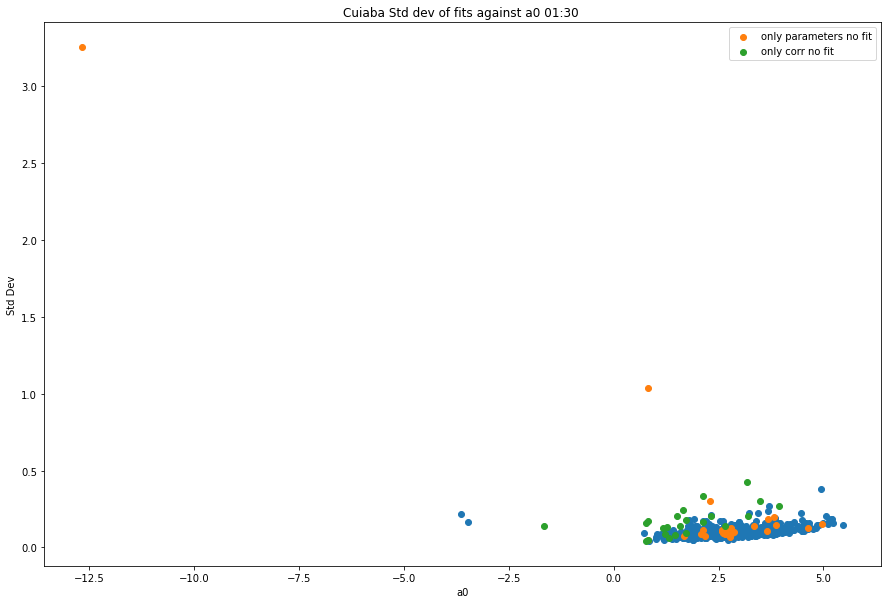

In [138]:
#Analysis of the fit
#aqua night
fit_analysis = aqua_parameters_night.copy()
overpass_time = '01:30'
overpass_name = 'aquanight'

fit_analysis['params_poor_fit'] = 0

fit_analysis.loc[abs(fit_analysis['night_std_dev_a0'] / fit_analysis['night_a0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_x0'] / fit_analysis['night_x0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_y0'] / fit_analysis['night_y0']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_phi'] / fit_analysis['night_phi']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ax'] / fit_analysis['night_ax']) > 1, 'params_poor_fit'] = 1
fit_analysis.loc[abs(fit_analysis['night_std_dev_ay'] / fit_analysis['night_ay']) > 1, 'params_poor_fit'] = 1

fit_analysis['corr_poor_fit'] = 0
fit_analysis.loc[(fit_analysis['corr'] < 0.5),'corr_poor_fit'] = 1

#plot rmse
a0_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].night_a0
a0_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 0)].night_std_dev_a0

a0_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].night_a0
a0_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 1)].night_std_dev_a0

a0_param_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].night_a0
a0_param_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 1) & (fit_analysis['corr_poor_fit'] == 0)].night_std_dev_a0

a0_corr_no_fits = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].night_a0
a0_corr_no_fits_sd = fit_analysis[(fit_analysis['params_poor_fit'] == 0) & (fit_analysis['corr_poor_fit'] == 1)].night_std_dev_a0


fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(15, 10))
axes.scatter(a0_fits, a0_fits_sd)
#axes.scatter(a0_no_fits, a0_no_fits_sd, label = 'Both criteria no fit')
axes.scatter(a0_param_no_fits, a0_param_no_fits_sd, label = 'only parameters no fit')
axes.scatter(a0_corr_no_fits, a0_corr_no_fits_sd, label = 'only corr no fit')
axes.set(xlabel = 'a0', ylabel = 'Std Dev', title = '{} Std dev of fits against a0 {} '.format(City_name, overpass_time))
plt.legend()

#save 
plt.savefig('{}_sd_v_a0_fits_{}.png'.format(City_name,overpass_name))

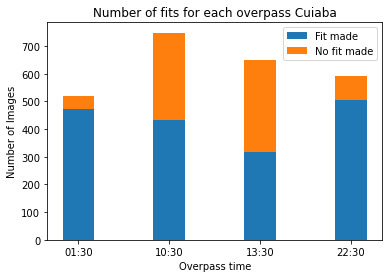

In [139]:
#create bar charts of the fits
terra_day_no_fit_count = len(terra_parameters_day_qc[np.isnan(terra_parameters_day_qc['day_a0'])])
terra_day_fit_count = len(terra_parameters_day_qc) - terra_day_no_fit_count 

terra_night_no_fit_count = len(terra_parameters_night_qc[np.isnan(terra_parameters_night_qc['night_a0'])])
terra_night_fit_count = len(terra_parameters_night_qc) - terra_night_no_fit_count

aqua_day_no_fit_count = len(aqua_parameters_day_qc[np.isnan(aqua_parameters_day_qc['day_a0'])])
aqua_day_fit_count = len(aqua_parameters_day_qc) - aqua_day_no_fit_count

aqua_night_no_fit_count = len(aqua_parameters_night_qc[np.isnan(aqua_parameters_night_qc['night_a0'])])
aqua_night_fit_count = len(aqua_parameters_night_qc) - aqua_night_no_fit_count

no_fits = (aqua_night_no_fit_count, terra_day_no_fit_count, aqua_day_no_fit_count, terra_night_no_fit_count)
fits = (aqua_night_fit_count, terra_day_fit_count, aqua_day_fit_count, terra_night_fit_count)

N = 4 #number of bars
ind = np.arange(N)
width = 0.35 #width of the bars

p1 = plt.bar(ind, fits, width)
p2 = plt.bar(ind, no_fits, width, bottom = fits)

plt.ylabel('Number of Images')
plt.xlabel('Overpass time')
plt.title('Number of fits for each overpass {}'.format(City_name))
plt.xticks(ind, ('01:30', '10:30', '13:30', '22:30'))
plt.legend((p1[0], p2[0]),('Fit made', 'No fit made'))

#save plot
plt.savefig('{}_fits_per_overpass_time.png'.format(City_name))

In [13]:
#for all cities
#load in all the cities 
CITY_COUNTRY = "HUAMBO_ANGOLA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Huambo_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Huambo_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Huambo_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Huambo_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "ANAPOLIS_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Anapolis_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Anapolis_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Anapolis_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Anapolis_aqua_parameters_night_qc = pickle.load(f)    
        
CITY_COUNTRY = "CUIABA_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Cuiaba_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Cuiaba_terra_parameters_night_qc = pickle.load(f)
      #aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Cuiaba_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Cuiaba_aqua_parameters_night_qc = pickle.load(f)    
    
    
CITY_COUNTRY = "FRANCA_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Franca_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Franca_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Franca_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Franca_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "MARINGA_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Maringa_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Maringa_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Maringa_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Maringa_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "PIRACICABA_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Piracicaba_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Piracicaba_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Piracicaba_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Piracicaba_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "RIBEIRAO_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ribeirao_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ribeirao_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ribeirao_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ribeirao_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "SAO_JOSE_DO_RIO_PRETO_BRAZIL"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Sao_Jose_Do_Rio_Preto_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Sao_Jose_Do_Rio_Preto_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Sao_Jose_Do_Rio_Preto_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Sao_Jose_Do_Rio_Preto_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "LINQING_CHINA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Linqing_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Linqing_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Linqing_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Linqing_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "AKOLA_INDIA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Akola_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Akola_terra_parameters_night_qc = pickle.load(f)
      #aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Akola_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Akola_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "HISAR_INDIA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Hisar_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Hisar_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Hisar_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Hisar_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "PARBHANI_INDIA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Parbhani_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Parbhani_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Parbhani_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Parbhani_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "SATNA_INDIA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Satna_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Satna_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Satna_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Satna_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "SHAHJAHANPUR_INDIA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Shahjahanpur_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Shahjahanpur_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Shahjahanpur_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Shahjahanpur_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "BLOEMFONTEIN_SOUTH_AFRICA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bloemfontein_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bloemfontein_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bloemfontein_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bloemfontein_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "AL_GADARIF_SUDAN"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Al_Gadarif_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Al_Gadarif_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Al_Gadarif_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Al_Gadarif_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "SPOKANE_UNITED_STATES"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Spokane_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Spokane_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Spokane_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Spokane_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "NDOLA_ZAMBIA"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ndola_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ndola_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ndola_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Ndola_aqua_parameters_night_qc = pickle.load(f)   

CITY_COUNTRY = "BULAWAYO_ZIMBABWE"    
#terra parameters
SATELLITE = 'MOD11A2' #TERRA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bulawayo_terra_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bulawayo_terra_parameters_night_qc = pickle.load(f)
#aqua parameters    
SATELLITE = 'MYD11A2' #AQUA
os.chdir(os.path.join('D:\\','MODIS_8_day_LST', CITY_COUNTRY, SATELLITE))
#parameters with not good quality set to nan    
pickle_name = 'Parameters_Day_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bulawayo_aqua_parameters_day_qc = pickle.load(f)
pickle_name = 'Parameters_Night_{}_{}.pkl'.format(CITY_COUNTRY, SATELLITE)
with open(pickle_name, 'rb') as f:
    Bulawayo_aqua_parameters_night_qc = pickle.load(f)   


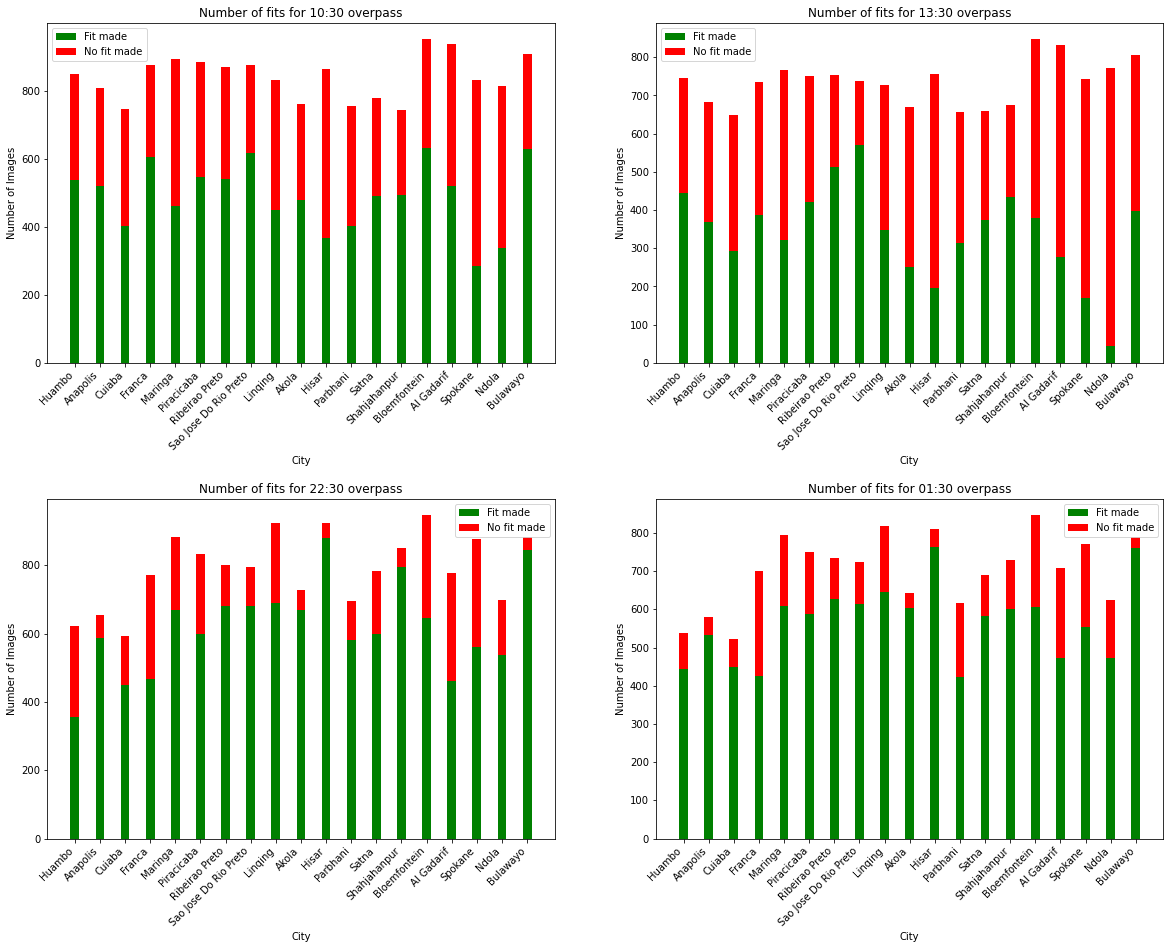

In [46]:
#make plots
#create bar charts of the fits
#extract info
#terra day
Huambo_terra_day_no_fit_count = len(Huambo_terra_parameters_day_qc[np.isnan(Huambo_terra_parameters_day_qc['day_a0'])])
Huambo_terra_day_fit_count = len(Huambo_terra_parameters_day_qc) - Huambo_terra_day_no_fit_count 

Anapolis_terra_day_no_fit_count = len(Anapolis_terra_parameters_day_qc[np.isnan(Anapolis_terra_parameters_day_qc['day_a0'])])
Anapolis_terra_day_fit_count = len(Anapolis_terra_parameters_day_qc) - Anapolis_terra_day_no_fit_count 

Cuiaba_terra_day_no_fit_count = len(Cuiaba_terra_parameters_day_qc[np.isnan(Cuiaba_terra_parameters_day_qc['day_a0'])])
Cuiaba_terra_day_fit_count = len(Cuiaba_terra_parameters_day_qc) - Cuiaba_terra_day_no_fit_count 

Franca_terra_day_no_fit_count = len(Franca_terra_parameters_day_qc[np.isnan(Franca_terra_parameters_day_qc['day_a0'])])
Franca_terra_day_fit_count = len(Franca_terra_parameters_day_qc) - Franca_terra_day_no_fit_count 

Maringa_terra_day_no_fit_count = len(Maringa_terra_parameters_day_qc[np.isnan(Maringa_terra_parameters_day_qc['day_a0'])])
Maringa_terra_day_fit_count = len(Maringa_terra_parameters_day_qc) - Maringa_terra_day_no_fit_count 

Piracicaba_terra_day_no_fit_count = len(Piracicaba_terra_parameters_day_qc[np.isnan(Piracicaba_terra_parameters_day_qc['day_a0'])])
Piracicaba_terra_day_fit_count = len(Piracicaba_terra_parameters_day_qc) - Piracicaba_terra_day_no_fit_count 

Ribeirao_terra_day_no_fit_count = len(Ribeirao_terra_parameters_day_qc[np.isnan(Ribeirao_terra_parameters_day_qc['day_a0'])])
Ribeirao_terra_day_fit_count = len(Ribeirao_terra_parameters_day_qc) - Ribeirao_terra_day_no_fit_count 

Sao_Jose_Do_Rio_Preto_terra_day_no_fit_count = len(Sao_Jose_Do_Rio_Preto_terra_parameters_day_qc[np.isnan(Sao_Jose_Do_Rio_Preto_terra_parameters_day_qc['day_a0'])])
Sao_Jose_Do_Rio_Preto_terra_day_fit_count = len(Sao_Jose_Do_Rio_Preto_terra_parameters_day_qc) - Sao_Jose_Do_Rio_Preto_terra_day_no_fit_count 

Linqing_terra_day_no_fit_count = len(Linqing_terra_parameters_day_qc[np.isnan(Linqing_terra_parameters_day_qc['day_a0'])])
Linqing_terra_day_fit_count = len(Linqing_terra_parameters_day_qc) - Linqing_terra_day_no_fit_count 

Akola_terra_day_no_fit_count = len(Akola_terra_parameters_day_qc[np.isnan(Akola_terra_parameters_day_qc['day_a0'])])
Akola_terra_day_fit_count = len(Akola_terra_parameters_day_qc) - Akola_terra_day_no_fit_count 

Hisar_terra_day_no_fit_count = len(Hisar_terra_parameters_day_qc[np.isnan(Hisar_terra_parameters_day_qc['day_a0'])])
Hisar_terra_day_fit_count = len(Hisar_terra_parameters_day_qc) - Hisar_terra_day_no_fit_count 

Parbhani_terra_day_no_fit_count = len(Parbhani_terra_parameters_day_qc[np.isnan(Parbhani_terra_parameters_day_qc['day_a0'])])
Parbhani_terra_day_fit_count = len(Parbhani_terra_parameters_day_qc) - Parbhani_terra_day_no_fit_count 

Satna_terra_day_no_fit_count = len(Satna_terra_parameters_day_qc[np.isnan(Satna_terra_parameters_day_qc['day_a0'])])
Satna_terra_day_fit_count = len(Satna_terra_parameters_day_qc) - Satna_terra_day_no_fit_count 

Shahjahanpur_terra_day_no_fit_count = len(Shahjahanpur_terra_parameters_day_qc[np.isnan(Shahjahanpur_terra_parameters_day_qc['day_a0'])])
Shahjahanpur_terra_day_fit_count = len(Shahjahanpur_terra_parameters_day_qc) - Shahjahanpur_terra_day_no_fit_count 

Bloemfontein_terra_day_no_fit_count = len(Bloemfontein_terra_parameters_day_qc[np.isnan(Bloemfontein_terra_parameters_day_qc['day_a0'])])
Bloemfontein_terra_day_fit_count = len(Bloemfontein_terra_parameters_day_qc) - Bloemfontein_terra_day_no_fit_count 

Al_Gadarif_terra_day_no_fit_count = len(Al_Gadarif_terra_parameters_day_qc[np.isnan(Al_Gadarif_terra_parameters_day_qc['day_a0'])])
Al_Gadarif_terra_day_fit_count = len(Al_Gadarif_terra_parameters_day_qc) - Al_Gadarif_terra_day_no_fit_count 

Spokane_terra_day_no_fit_count = len(Spokane_terra_parameters_day_qc[np.isnan(Spokane_terra_parameters_day_qc['day_a0'])])
Spokane_terra_day_fit_count = len(Spokane_terra_parameters_day_qc) - Spokane_terra_day_no_fit_count 

Ndola_terra_day_no_fit_count = len(Ndola_terra_parameters_day_qc[np.isnan(Ndola_terra_parameters_day_qc['day_a0'])])
Ndola_terra_day_fit_count = len(Ndola_terra_parameters_day_qc) - Ndola_terra_day_no_fit_count 

Bulawayo_terra_day_no_fit_count = len(Bulawayo_terra_parameters_day_qc[np.isnan(Bulawayo_terra_parameters_day_qc['day_a0'])])
Bulawayo_terra_day_fit_count = len(Bulawayo_terra_parameters_day_qc) - Bulawayo_terra_day_no_fit_count 

#terra night 
Huambo_terra_night_no_fit_count = len(Huambo_terra_parameters_night_qc[np.isnan(Huambo_terra_parameters_night_qc['night_a0'])])
Huambo_terra_night_fit_count = len(Huambo_terra_parameters_night_qc) - Huambo_terra_night_no_fit_count 

Anapolis_terra_night_no_fit_count = len(Anapolis_terra_parameters_night_qc[np.isnan(Anapolis_terra_parameters_night_qc['night_a0'])])
Anapolis_terra_night_fit_count = len(Anapolis_terra_parameters_night_qc) - Anapolis_terra_night_no_fit_count 

Cuiaba_terra_night_no_fit_count = len(Cuiaba_terra_parameters_night_qc[np.isnan(Cuiaba_terra_parameters_night_qc['night_a0'])])
Cuiaba_terra_night_fit_count = len(Cuiaba_terra_parameters_night_qc) - Cuiaba_terra_night_no_fit_count 

Franca_terra_night_no_fit_count = len(Franca_terra_parameters_night_qc[np.isnan(Franca_terra_parameters_night_qc['night_a0'])])
Franca_terra_night_fit_count = len(Franca_terra_parameters_night_qc) - Franca_terra_night_no_fit_count 

Maringa_terra_night_no_fit_count = len(Maringa_terra_parameters_night_qc[np.isnan(Maringa_terra_parameters_night_qc['night_a0'])])
Maringa_terra_night_fit_count = len(Maringa_terra_parameters_night_qc) - Maringa_terra_night_no_fit_count 

Piracicaba_terra_night_no_fit_count = len(Piracicaba_terra_parameters_night_qc[np.isnan(Piracicaba_terra_parameters_night_qc['night_a0'])])
Piracicaba_terra_night_fit_count = len(Piracicaba_terra_parameters_night_qc) - Piracicaba_terra_night_no_fit_count 

Ribeirao_terra_night_no_fit_count = len(Ribeirao_terra_parameters_night_qc[np.isnan(Ribeirao_terra_parameters_night_qc['night_a0'])])
Ribeirao_terra_night_fit_count = len(Ribeirao_terra_parameters_night_qc) - Ribeirao_terra_night_no_fit_count 

Sao_Jose_Do_Rio_Preto_terra_night_no_fit_count = len(Sao_Jose_Do_Rio_Preto_terra_parameters_night_qc[np.isnan(Sao_Jose_Do_Rio_Preto_terra_parameters_night_qc['night_a0'])])
Sao_Jose_Do_Rio_Preto_terra_night_fit_count = len(Sao_Jose_Do_Rio_Preto_terra_parameters_night_qc) - Sao_Jose_Do_Rio_Preto_terra_night_no_fit_count 

Linqing_terra_night_no_fit_count = len(Linqing_terra_parameters_night_qc[np.isnan(Linqing_terra_parameters_night_qc['night_a0'])])
Linqing_terra_night_fit_count = len(Linqing_terra_parameters_night_qc) - Linqing_terra_night_no_fit_count 

Akola_terra_night_no_fit_count = len(Akola_terra_parameters_night_qc[np.isnan(Akola_terra_parameters_night_qc['night_a0'])])
Akola_terra_night_fit_count = len(Akola_terra_parameters_night_qc) - Akola_terra_night_no_fit_count 

Hisar_terra_night_no_fit_count = len(Hisar_terra_parameters_night_qc[np.isnan(Hisar_terra_parameters_night_qc['night_a0'])])
Hisar_terra_night_fit_count = len(Hisar_terra_parameters_night_qc) - Hisar_terra_night_no_fit_count 

Parbhani_terra_night_no_fit_count = len(Parbhani_terra_parameters_night_qc[np.isnan(Parbhani_terra_parameters_night_qc['night_a0'])])
Parbhani_terra_night_fit_count = len(Parbhani_terra_parameters_night_qc) - Parbhani_terra_night_no_fit_count 

Satna_terra_night_no_fit_count = len(Satna_terra_parameters_night_qc[np.isnan(Satna_terra_parameters_night_qc['night_a0'])])
Satna_terra_night_fit_count = len(Satna_terra_parameters_night_qc) - Satna_terra_night_no_fit_count 

Shahjahanpur_terra_night_no_fit_count = len(Shahjahanpur_terra_parameters_night_qc[np.isnan(Shahjahanpur_terra_parameters_night_qc['night_a0'])])
Shahjahanpur_terra_night_fit_count = len(Shahjahanpur_terra_parameters_night_qc) - Shahjahanpur_terra_night_no_fit_count 

Bloemfontein_terra_night_no_fit_count = len(Bloemfontein_terra_parameters_night_qc[np.isnan(Bloemfontein_terra_parameters_night_qc['night_a0'])])
Bloemfontein_terra_night_fit_count = len(Bloemfontein_terra_parameters_night_qc) - Bloemfontein_terra_night_no_fit_count 

Al_Gadarif_terra_night_no_fit_count = len(Al_Gadarif_terra_parameters_night_qc[np.isnan(Al_Gadarif_terra_parameters_night_qc['night_a0'])])
Al_Gadarif_terra_night_fit_count = len(Al_Gadarif_terra_parameters_night_qc) - Al_Gadarif_terra_night_no_fit_count 

Spokane_terra_night_no_fit_count = len(Spokane_terra_parameters_night_qc[np.isnan(Spokane_terra_parameters_night_qc['night_a0'])])
Spokane_terra_night_fit_count = len(Spokane_terra_parameters_night_qc) - Spokane_terra_night_no_fit_count 

Ndola_terra_night_no_fit_count = len(Ndola_terra_parameters_night_qc[np.isnan(Ndola_terra_parameters_night_qc['night_a0'])])
Ndola_terra_night_fit_count = len(Ndola_terra_parameters_night_qc) - Ndola_terra_night_no_fit_count 

Bulawayo_terra_night_no_fit_count = len(Bulawayo_terra_parameters_night_qc[np.isnan(Bulawayo_terra_parameters_night_qc['night_a0'])])
Bulawayo_terra_night_fit_count = len(Bulawayo_terra_parameters_night_qc) - Bulawayo_terra_night_no_fit_count

#aqua day
Huambo_aqua_day_no_fit_count = len(Huambo_aqua_parameters_day_qc[np.isnan(Huambo_aqua_parameters_day_qc['day_a0'])])
Huambo_aqua_day_fit_count = len(Huambo_aqua_parameters_day_qc) - Huambo_aqua_day_no_fit_count 

Anapolis_aqua_day_no_fit_count = len(Anapolis_aqua_parameters_day_qc[np.isnan(Anapolis_aqua_parameters_day_qc['day_a0'])])
Anapolis_aqua_day_fit_count = len(Anapolis_aqua_parameters_day_qc) - Anapolis_aqua_day_no_fit_count 

Cuiaba_aqua_day_no_fit_count = len(Cuiaba_aqua_parameters_day_qc[np.isnan(Cuiaba_aqua_parameters_day_qc['day_a0'])])
Cuiaba_aqua_day_fit_count = len(Cuiaba_aqua_parameters_day_qc) - Cuiaba_aqua_day_no_fit_count 

Franca_aqua_day_no_fit_count = len(Franca_aqua_parameters_day_qc[np.isnan(Franca_aqua_parameters_day_qc['day_a0'])])
Franca_aqua_day_fit_count = len(Franca_aqua_parameters_day_qc) - Franca_aqua_day_no_fit_count 

Maringa_aqua_day_no_fit_count = len(Maringa_aqua_parameters_day_qc[np.isnan(Maringa_aqua_parameters_day_qc['day_a0'])])
Maringa_aqua_day_fit_count = len(Maringa_aqua_parameters_day_qc) - Maringa_aqua_day_no_fit_count 

Piracicaba_aqua_day_no_fit_count = len(Piracicaba_aqua_parameters_day_qc[np.isnan(Piracicaba_aqua_parameters_day_qc['day_a0'])])
Piracicaba_aqua_day_fit_count = len(Piracicaba_aqua_parameters_day_qc) - Piracicaba_aqua_day_no_fit_count 

Ribeirao_aqua_day_no_fit_count = len(Ribeirao_aqua_parameters_day_qc[np.isnan(Ribeirao_aqua_parameters_day_qc['day_a0'])])
Ribeirao_aqua_day_fit_count = len(Ribeirao_aqua_parameters_day_qc) - Ribeirao_aqua_day_no_fit_count 

Sao_Jose_Do_Rio_Preto_aqua_day_no_fit_count = len(Sao_Jose_Do_Rio_Preto_aqua_parameters_day_qc[np.isnan(Sao_Jose_Do_Rio_Preto_aqua_parameters_day_qc['day_a0'])])
Sao_Jose_Do_Rio_Preto_aqua_day_fit_count = len(Sao_Jose_Do_Rio_Preto_aqua_parameters_day_qc) - Sao_Jose_Do_Rio_Preto_aqua_day_no_fit_count 

Linqing_aqua_day_no_fit_count = len(Linqing_aqua_parameters_day_qc[np.isnan(Linqing_aqua_parameters_day_qc['day_a0'])])
Linqing_aqua_day_fit_count = len(Linqing_aqua_parameters_day_qc) - Linqing_aqua_day_no_fit_count 

Akola_aqua_day_no_fit_count = len(Akola_aqua_parameters_day_qc[np.isnan(Akola_aqua_parameters_day_qc['day_a0'])])
Akola_aqua_day_fit_count = len(Akola_aqua_parameters_day_qc) - Akola_aqua_day_no_fit_count 

Hisar_aqua_day_no_fit_count = len(Hisar_aqua_parameters_day_qc[np.isnan(Hisar_aqua_parameters_day_qc['day_a0'])])
Hisar_aqua_day_fit_count = len(Hisar_aqua_parameters_day_qc) - Hisar_aqua_day_no_fit_count 

Parbhani_aqua_day_no_fit_count = len(Parbhani_aqua_parameters_day_qc[np.isnan(Parbhani_aqua_parameters_day_qc['day_a0'])])
Parbhani_aqua_day_fit_count = len(Parbhani_aqua_parameters_day_qc) - Parbhani_aqua_day_no_fit_count 

Satna_aqua_day_no_fit_count = len(Satna_aqua_parameters_day_qc[np.isnan(Satna_aqua_parameters_day_qc['day_a0'])])
Satna_aqua_day_fit_count = len(Satna_aqua_parameters_day_qc) - Satna_aqua_day_no_fit_count 

Shahjahanpur_aqua_day_no_fit_count = len(Shahjahanpur_aqua_parameters_day_qc[np.isnan(Shahjahanpur_aqua_parameters_day_qc['day_a0'])])
Shahjahanpur_aqua_day_fit_count = len(Shahjahanpur_aqua_parameters_day_qc) - Shahjahanpur_aqua_day_no_fit_count 

Bloemfontein_aqua_day_no_fit_count = len(Bloemfontein_aqua_parameters_day_qc[np.isnan(Bloemfontein_aqua_parameters_day_qc['day_a0'])])
Bloemfontein_aqua_day_fit_count = len(Bloemfontein_aqua_parameters_day_qc) - Bloemfontein_aqua_day_no_fit_count 

Al_Gadarif_aqua_day_no_fit_count = len(Al_Gadarif_aqua_parameters_day_qc[np.isnan(Al_Gadarif_aqua_parameters_day_qc['day_a0'])])
Al_Gadarif_aqua_day_fit_count = len(Al_Gadarif_aqua_parameters_day_qc) - Al_Gadarif_aqua_day_no_fit_count 

Spokane_aqua_day_no_fit_count = len(Spokane_aqua_parameters_day_qc[np.isnan(Spokane_aqua_parameters_day_qc['day_a0'])])
Spokane_aqua_day_fit_count = len(Spokane_aqua_parameters_day_qc) - Spokane_aqua_day_no_fit_count 

Ndola_aqua_day_no_fit_count = len(Ndola_aqua_parameters_day_qc[np.isnan(Ndola_aqua_parameters_day_qc['day_a0'])])
Ndola_aqua_day_fit_count = len(Ndola_aqua_parameters_day_qc) - Ndola_aqua_day_no_fit_count 

Bulawayo_aqua_day_no_fit_count = len(Bulawayo_aqua_parameters_day_qc[np.isnan(Bulawayo_aqua_parameters_day_qc['day_a0'])])
Bulawayo_aqua_day_fit_count = len(Bulawayo_aqua_parameters_day_qc) - Bulawayo_aqua_day_no_fit_count


#aqua night
Huambo_aqua_night_no_fit_count = len(Huambo_aqua_parameters_night_qc[np.isnan(Huambo_aqua_parameters_night_qc['night_a0'])])
Huambo_aqua_night_fit_count = len(Huambo_aqua_parameters_night_qc) - Huambo_aqua_night_no_fit_count 

Anapolis_aqua_night_no_fit_count = len(Anapolis_aqua_parameters_night_qc[np.isnan(Anapolis_aqua_parameters_night_qc['night_a0'])])
Anapolis_aqua_night_fit_count = len(Anapolis_aqua_parameters_night_qc) - Anapolis_aqua_night_no_fit_count 

Cuiaba_aqua_night_no_fit_count = len(Cuiaba_aqua_parameters_night_qc[np.isnan(Cuiaba_aqua_parameters_night_qc['night_a0'])])
Cuiaba_aqua_night_fit_count = len(Cuiaba_aqua_parameters_night_qc) - Cuiaba_aqua_night_no_fit_count 

Franca_aqua_night_no_fit_count = len(Franca_aqua_parameters_night_qc[np.isnan(Franca_aqua_parameters_night_qc['night_a0'])])
Franca_aqua_night_fit_count = len(Franca_aqua_parameters_night_qc) - Franca_aqua_night_no_fit_count 

Maringa_aqua_night_no_fit_count = len(Maringa_aqua_parameters_night_qc[np.isnan(Maringa_aqua_parameters_night_qc['night_a0'])])
Maringa_aqua_night_fit_count = len(Maringa_aqua_parameters_night_qc) - Maringa_aqua_night_no_fit_count 

Piracicaba_aqua_night_no_fit_count = len(Piracicaba_aqua_parameters_night_qc[np.isnan(Piracicaba_aqua_parameters_night_qc['night_a0'])])
Piracicaba_aqua_night_fit_count = len(Piracicaba_aqua_parameters_night_qc) - Piracicaba_aqua_night_no_fit_count 

Ribeirao_aqua_night_no_fit_count = len(Ribeirao_aqua_parameters_night_qc[np.isnan(Ribeirao_aqua_parameters_night_qc['night_a0'])])
Ribeirao_aqua_night_fit_count = len(Ribeirao_aqua_parameters_night_qc) - Ribeirao_aqua_night_no_fit_count 

Sao_Jose_Do_Rio_Preto_aqua_night_no_fit_count = len(Sao_Jose_Do_Rio_Preto_aqua_parameters_night_qc[np.isnan(Sao_Jose_Do_Rio_Preto_aqua_parameters_night_qc['night_a0'])])
Sao_Jose_Do_Rio_Preto_aqua_night_fit_count = len(Sao_Jose_Do_Rio_Preto_aqua_parameters_night_qc) - Sao_Jose_Do_Rio_Preto_aqua_night_no_fit_count 

Linqing_aqua_night_no_fit_count = len(Linqing_aqua_parameters_night_qc[np.isnan(Linqing_aqua_parameters_night_qc['night_a0'])])
Linqing_aqua_night_fit_count = len(Linqing_aqua_parameters_night_qc) - Linqing_aqua_night_no_fit_count 

Akola_aqua_night_no_fit_count = len(Akola_aqua_parameters_night_qc[np.isnan(Akola_aqua_parameters_night_qc['night_a0'])])
Akola_aqua_night_fit_count = len(Akola_aqua_parameters_night_qc) - Akola_aqua_night_no_fit_count 

Hisar_aqua_night_no_fit_count = len(Hisar_aqua_parameters_night_qc[np.isnan(Hisar_aqua_parameters_night_qc['night_a0'])])
Hisar_aqua_night_fit_count = len(Hisar_aqua_parameters_night_qc) - Hisar_aqua_night_no_fit_count 

Parbhani_aqua_night_no_fit_count = len(Parbhani_aqua_parameters_night_qc[np.isnan(Parbhani_aqua_parameters_night_qc['night_a0'])])
Parbhani_aqua_night_fit_count = len(Parbhani_aqua_parameters_night_qc) - Parbhani_aqua_night_no_fit_count 

Satna_aqua_night_no_fit_count = len(Satna_aqua_parameters_night_qc[np.isnan(Satna_aqua_parameters_night_qc['night_a0'])])
Satna_aqua_night_fit_count = len(Satna_aqua_parameters_night_qc) - Satna_aqua_night_no_fit_count 

Shahjahanpur_aqua_night_no_fit_count = len(Shahjahanpur_aqua_parameters_night_qc[np.isnan(Shahjahanpur_aqua_parameters_night_qc['night_a0'])])
Shahjahanpur_aqua_night_fit_count = len(Shahjahanpur_aqua_parameters_night_qc) - Shahjahanpur_aqua_night_no_fit_count 

Bloemfontein_aqua_night_no_fit_count = len(Bloemfontein_aqua_parameters_night_qc[np.isnan(Bloemfontein_aqua_parameters_night_qc['night_a0'])])
Bloemfontein_aqua_night_fit_count = len(Bloemfontein_aqua_parameters_night_qc) - Bloemfontein_aqua_night_no_fit_count 

Al_Gadarif_aqua_night_no_fit_count = len(Al_Gadarif_aqua_parameters_night_qc[np.isnan(Al_Gadarif_aqua_parameters_night_qc['night_a0'])])
Al_Gadarif_aqua_night_fit_count = len(Al_Gadarif_aqua_parameters_night_qc) - Al_Gadarif_aqua_night_no_fit_count 

Spokane_aqua_night_no_fit_count = len(Spokane_aqua_parameters_night_qc[np.isnan(Spokane_aqua_parameters_night_qc['night_a0'])])
Spokane_aqua_night_fit_count = len(Spokane_aqua_parameters_night_qc) - Spokane_aqua_night_no_fit_count 

Ndola_aqua_night_no_fit_count = len(Ndola_aqua_parameters_night_qc[np.isnan(Ndola_aqua_parameters_night_qc['night_a0'])])
Ndola_aqua_night_fit_count = len(Ndola_aqua_parameters_night_qc) - Ndola_aqua_night_no_fit_count 

Bulawayo_aqua_night_no_fit_count = len(Bulawayo_aqua_parameters_night_qc[np.isnan(Bulawayo_aqua_parameters_night_qc['night_a0'])])
Bulawayo_aqua_night_fit_count = len(Bulawayo_aqua_parameters_night_qc) - Bulawayo_aqua_night_no_fit_count

terra_day_no_fits = (Huambo_terra_day_no_fit_count, Anapolis_terra_day_no_fit_count, Cuiaba_terra_day_no_fit_count,
                      Franca_terra_day_no_fit_count, Maringa_terra_day_no_fit_count, Piracicaba_terra_day_no_fit_count,
                      Ribeirao_terra_day_no_fit_count, Sao_Jose_Do_Rio_Preto_terra_day_no_fit_count, 
                      Linqing_terra_day_no_fit_count, Akola_terra_day_no_fit_count, Hisar_terra_day_no_fit_count,
                      Parbhani_terra_day_no_fit_count, Satna_terra_day_no_fit_count, Shahjahanpur_terra_day_no_fit_count,
                      Bloemfontein_terra_day_no_fit_count, Al_Gadarif_terra_day_no_fit_count, Spokane_terra_day_no_fit_count,
                      Ndola_terra_day_no_fit_count, Bulawayo_terra_day_no_fit_count)

terra_night_no_fits = (Huambo_terra_night_no_fit_count, Anapolis_terra_night_no_fit_count, Cuiaba_terra_night_no_fit_count,
                      Franca_terra_night_no_fit_count, Maringa_terra_night_no_fit_count, Piracicaba_terra_night_no_fit_count,
                      Ribeirao_terra_night_no_fit_count, Sao_Jose_Do_Rio_Preto_terra_night_no_fit_count, 
                      Linqing_terra_night_no_fit_count, Akola_terra_night_no_fit_count, Hisar_terra_night_no_fit_count,
                      Parbhani_terra_night_no_fit_count, Satna_terra_night_no_fit_count, Shahjahanpur_terra_night_no_fit_count,
                      Bloemfontein_terra_night_no_fit_count, Al_Gadarif_terra_night_no_fit_count, Spokane_terra_night_no_fit_count,
                      Ndola_terra_night_no_fit_count, Bulawayo_terra_night_no_fit_count)

aqua_day_no_fits = (Huambo_aqua_day_no_fit_count, Anapolis_aqua_day_no_fit_count, Cuiaba_aqua_day_no_fit_count,
                      Franca_aqua_day_no_fit_count, Maringa_aqua_day_no_fit_count, Piracicaba_aqua_day_no_fit_count,
                      Ribeirao_aqua_day_no_fit_count, Sao_Jose_Do_Rio_Preto_aqua_day_no_fit_count, 
                      Linqing_aqua_day_no_fit_count, Akola_aqua_day_no_fit_count, Hisar_aqua_day_no_fit_count,
                      Parbhani_aqua_day_no_fit_count, Satna_aqua_day_no_fit_count, Shahjahanpur_aqua_day_no_fit_count,
                      Bloemfontein_aqua_day_no_fit_count, Al_Gadarif_aqua_day_no_fit_count, Spokane_aqua_day_no_fit_count,
                      Ndola_aqua_day_no_fit_count, Bulawayo_aqua_day_no_fit_count)

aqua_night_no_fits = (Huambo_aqua_night_no_fit_count, Anapolis_aqua_night_no_fit_count, Cuiaba_aqua_night_no_fit_count,
                      Franca_aqua_night_no_fit_count, Maringa_aqua_night_no_fit_count, Piracicaba_aqua_night_no_fit_count,
                      Ribeirao_aqua_night_no_fit_count, Sao_Jose_Do_Rio_Preto_aqua_night_no_fit_count, 
                      Linqing_aqua_night_no_fit_count, Akola_aqua_night_no_fit_count, Hisar_aqua_night_no_fit_count,
                      Parbhani_aqua_night_no_fit_count, Satna_aqua_night_no_fit_count, Shahjahanpur_aqua_night_no_fit_count,
                      Bloemfontein_aqua_night_no_fit_count, Al_Gadarif_aqua_night_no_fit_count, Spokane_aqua_night_no_fit_count,
                      Ndola_aqua_night_no_fit_count, Bulawayo_aqua_night_no_fit_count)

terra_day_fits = (Huambo_terra_day_fit_count, Anapolis_terra_day_fit_count, Cuiaba_terra_day_fit_count,
                      Franca_terra_day_fit_count, Maringa_terra_day_fit_count, Piracicaba_terra_day_fit_count,
                      Ribeirao_terra_day_fit_count, Sao_Jose_Do_Rio_Preto_terra_day_fit_count, 
                      Linqing_terra_day_fit_count, Akola_terra_day_fit_count, Hisar_terra_day_fit_count,
                      Parbhani_terra_day_fit_count, Satna_terra_day_fit_count, Shahjahanpur_terra_day_fit_count,
                      Bloemfontein_terra_day_fit_count, Al_Gadarif_terra_day_fit_count, Spokane_terra_day_fit_count,
                      Ndola_terra_day_fit_count, Bulawayo_terra_day_fit_count)

terra_night_fits = (Huambo_terra_night_fit_count, Anapolis_terra_night_fit_count, Cuiaba_terra_night_fit_count,
                      Franca_terra_night_fit_count, Maringa_terra_night_fit_count, Piracicaba_terra_night_fit_count,
                      Ribeirao_terra_night_fit_count, Sao_Jose_Do_Rio_Preto_terra_night_fit_count, 
                      Linqing_terra_night_fit_count, Akola_terra_night_fit_count, Hisar_terra_night_fit_count,
                      Parbhani_terra_night_fit_count, Satna_terra_night_fit_count, Shahjahanpur_terra_night_fit_count,
                      Bloemfontein_terra_night_fit_count, Al_Gadarif_terra_night_fit_count, Spokane_terra_night_fit_count,
                      Ndola_terra_night_fit_count, Bulawayo_terra_night_fit_count)

aqua_day_fits = (Huambo_aqua_day_fit_count, Anapolis_aqua_day_fit_count, Cuiaba_aqua_day_fit_count,
                      Franca_aqua_day_fit_count, Maringa_aqua_day_fit_count, Piracicaba_aqua_day_fit_count,
                      Ribeirao_aqua_day_fit_count, Sao_Jose_Do_Rio_Preto_aqua_day_fit_count, 
                      Linqing_aqua_day_fit_count, Akola_aqua_day_fit_count, Hisar_aqua_day_fit_count,
                      Parbhani_aqua_day_fit_count, Satna_aqua_day_fit_count, Shahjahanpur_aqua_day_fit_count,
                      Bloemfontein_aqua_day_fit_count, Al_Gadarif_aqua_day_fit_count, Spokane_aqua_day_fit_count,
                      Ndola_aqua_day_fit_count, Bulawayo_aqua_day_fit_count)

aqua_night_fits = (Huambo_aqua_night_fit_count, Anapolis_aqua_night_fit_count, Cuiaba_aqua_night_fit_count,
                      Franca_aqua_night_fit_count, Maringa_aqua_night_fit_count, Piracicaba_aqua_night_fit_count,
                      Ribeirao_aqua_night_fit_count, Sao_Jose_Do_Rio_Preto_aqua_night_fit_count, 
                      Linqing_aqua_night_fit_count, Akola_aqua_night_fit_count, Hisar_aqua_night_fit_count,
                      Parbhani_aqua_night_fit_count, Satna_aqua_night_fit_count, Shahjahanpur_aqua_night_fit_count,
                      Bloemfontein_aqua_night_fit_count, Al_Gadarif_aqua_night_fit_count, Spokane_aqua_night_fit_count,
                      Ndola_aqua_night_fit_count, Bulawayo_aqua_night_fit_count)

fig, axes = plt.subplots(nrows = 2,ncols = 2, figsize=(20, 15))
plt.subplots_adjust(hspace = 0.4)
N = 19 #number of bars
ind = np.arange(N)
width = 0.35 #width of the bars

#terra day overpass
p1 = axes[0,0].bar(ind, terra_day_fits, width, color = 'green')
p2 = axes[0,0].bar(ind, terra_day_no_fits, width, bottom = terra_day_fits, color = 'red')

axes[0,0].set(xlabel = 'City', ylabel ='Number of Images' )
axes[0,0].set_title('Number of fits for 10:30 overpass')
plt.sca(axes[0, 0])
plt.xticks(ind, ('Huambo', 'Anapolis', 'Cuiaba', 'Franca', 'Maringa','Piracicaba','Ribeirao Preto','Sao Jose Do Rio Preto'
                ,'Linqing', 'Akola', 'Hisar', 'Parbhani', 'Satna', 'Shahjahanpur', 'Bloemfontein', 'Al Gadarif', 'Spokane'
                ,'Ndola','Bulawayo'))
plt.xticks(rotation = 45, ha = 'right')

axes[0,0].legend((p1[0], p2[0]),('Fit made', 'No fit made'))

#aqua day overpass

p1 = axes[0,1].bar(ind, aqua_day_fits, width, color = 'green')
p2 = axes[0,1].bar(ind, aqua_day_no_fits, width, bottom = aqua_day_fits, color = 'red')

axes[0,1].set(xlabel = 'City', ylabel ='Number of Images' )
axes[0,1].set_title('Number of fits for 13:30 overpass')
plt.sca(axes[0, 1])
plt.xticks(ind, ('Huambo', 'Anapolis', 'Cuiaba', 'Franca', 'Maringa','Piracicaba','Ribeirao Preto','Sao Jose Do Rio Preto'
                ,'Linqing', 'Akola', 'Hisar', 'Parbhani', 'Satna', 'Shahjahanpur', 'Bloemfontein', 'Al Gadarif', 'Spokane'
                ,'Ndola','Bulawayo'))
plt.xticks(rotation = 45, ha = 'right')

axes[0,1].legend((p1[0], p2[0]),('Fit made', 'No fit made'))

#terra night
p1 = axes[1,0].bar(ind, terra_night_fits, width, color = 'green')
p2 = axes[1,0].bar(ind, terra_night_no_fits, width, bottom = terra_night_fits, color = 'red')

axes[1,0].set(xlabel = 'City', ylabel ='Number of Images' )
axes[1,0].set_title('Number of fits for 22:30 overpass')
plt.sca(axes[1, 0])
plt.xticks(ind, ('Huambo', 'Anapolis', 'Cuiaba', 'Franca', 'Maringa','Piracicaba','Ribeirao Preto','Sao Jose Do Rio Preto'
                ,'Linqing', 'Akola', 'Hisar', 'Parbhani', 'Satna', 'Shahjahanpur', 'Bloemfontein', 'Al Gadarif', 'Spokane'
                ,'Ndola','Bulawayo'))
plt.xticks(rotation = 45, ha = 'right')

axes[1,0].legend((p1[0], p2[0]),('Fit made', 'No fit made'))

#aqua night
p1 = axes[1,1].bar(ind, aqua_night_fits, width, color = 'green')
p2 = axes[1,1].bar(ind, aqua_night_no_fits, width, bottom = aqua_night_fits, color = 'red')

axes[1,1].set(xlabel = 'City', ylabel ='Number of Images' )
axes[1,1].set_title('Number of fits for 01:30 overpass')
plt.sca(axes[1, 1])
plt.xticks(ind, ('Huambo', 'Anapolis', 'Cuiaba', 'Franca', 'Maringa','Piracicaba','Ribeirao Preto','Sao Jose Do Rio Preto'
                ,'Linqing', 'Akola', 'Hisar', 'Parbhani', 'Satna', 'Shahjahanpur', 'Bloemfontein', 'Al Gadarif', 'Spokane'
                ,'Ndola','Bulawayo'))
plt.xticks(rotation = 45, ha = 'right')

axes[1,1].legend((p1[0], p2[0]),('Fit made', 'No fit made'))

#save plot
#plt.savefig('{}_fits_per_overpass_time.png'.format(City_name))


